# 데이터 및 라이브러리 로드

In [3]:
import os
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/My Drive/data/movielens/'

In [5]:
ratings_df = pd.read_csv(os.path.join(path + 'ratings.csv'), encoding='utf=8')
tags_df = pd.read_csv(os.path.join(path + 'tags.csv'), encoding='utf=8')
movies_df = pd.read_csv(os.path.join(path + 'movies.csv'), index_col = 'movieId', encoding='utf=8')

In [6]:
print(ratings_df.shape)
print(movies_df.shape)

(100836, 4)
(9742, 2)


# 장르 분석

In [7]:
movies_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [8]:
all_genres = [x.split('|') for x in movies_df['genres'].values]

In [11]:
all_genres[:5]

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy']]

In [14]:
import itertools

genres = list(set(list(itertools.chain(*all_genres)))) # itertools.chain 리스트를 합쳐줌
# *의 역할 : 컨테이너 타입의 데이터를 Unpacking
print(len(all_genres))
print(len(genres))
print(genres)

9742
20
['Adventure', 'War', 'Documentary', 'Children', 'Comedy', 'Romance', 'Crime', 'IMAX', 'Horror', 'Western', 'Animation', 'Drama', 'Action', 'Film-Noir', 'Sci-Fi', 'Thriller', 'Mystery', '(no genres listed)', 'Fantasy', 'Musical']


In [15]:
genres_df = pd.DataFrame(columns= genres, index= movies_df.index)
genres_df.head()

,Adventure,War,Documentary,Children,Comedy,Romance,Crime,IMAX,Horror,Western,Animation,Drama,Action,Film-Noir,Sci-Fi,Thriller,Mystery,(no genres listed),Fantasy,Musical
movieId,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
for i, row in genres_df.iterrows():
  movie_id = row.name
  list_of_genres = movies_df.loc[movie_id]['genres'].split('|')

  genres_df.loc[movie_id][list_of_genres] = 1

In [24]:
genres_df.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
genres_df = genres_df.fillna(0)
genres_df['num_genres'] = genres_df.sum(axis=1)
print(genres_df.shape)
print(genres_df)

(9742, 21)
         Adventure  War  Documentary  ...  Fantasy  Musical  num_genres
movieId                               ...                              
1                1    0            0  ...        1        0          10
2                1    0            0  ...        1        0           6
3                0    0            0  ...        0        0           4
4                0    0            0  ...        0        0           6
5                0    0            0  ...        0        0           2
...            ...  ...          ...  ...      ...      ...         ...
193581           0    0            0  ...        1        0           8
193583           0    0            0  ...        1        0           6
193585           0    0            0  ...        0        0           2
193587           0    0            0  ...        0        0           4
193609           0    0            0  ...        0        0           2

[9742 rows x 21 columns]


get_dummies 활용

In [22]:
genres_df = movies_df['genres'].str.get_dummies(sep='|')
genres_df.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
movies_df = pd.concat([movies_df, genres_df], axis=1)
movies_df.head()

,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


불필요한 칼럼 genres 삭제

In [26]:
movies_df.drop('genres', axis=1, inplace=True)
movies_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 특정 장르의 평점과 user분석

In [27]:
movies_df.columns

Index(['title', '(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

애니메이션 장르 분석

In [31]:
movieId_list = movies_df['title'][movies_df.Animation == 1]
movieId_list

movieId
1                                          Toy Story (1995)
13                                             Balto (1995)
48                                        Pocahontas (1995)
239                                   Goofy Movie, A (1995)
313                               Swan Princess, The (1994)
                                ...                        
193567    anohana: The Flower We Saw That Day - The Movi...
193573              Love Live! The School Idol Movie (2015)
193581            Black Butler: Book of the Atlantic (2017)
193583                         No Game No Life: Zero (2017)
193587                  Bungo Stray Dogs: Dead Apple (2018)
Name: title, Length: 611, dtype: object

In [30]:
movieId_list.index

Int64Index([     1,     13,     48,    239,    313,    364,    551,    558,
               588,    594,
            ...
            182639, 183897, 187541, 190219, 193565, 193567, 193573, 193581,
            193583, 193587],
           dtype='int64', name='movieId', length=611)

In [32]:
animation_df = ratings_df[ratings_df['movieId'].isin(movieId_list.index)]
animation_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
35,1,596,5.0,964982838
38,1,661,5.0,964982838
39,1,673,3.0,964981775
50,1,1023,5.0,964982681
...,...,...,...,...
100798,610,146309,4.0,1493850187
100805,610,149406,3.5,1479542295
100808,610,152081,4.0,1493846503
100813,610,157296,4.0,1493846563


In [33]:
# user 별 animation 장르 평점 평균
animation_df.groupby('userId')['rating'].mean()

userId
1      4.689655
3      0.500000
4      4.000000
5      4.333333
6      4.071429
         ...   
606    3.714286
607    3.333333
608    3.118182
609    3.000000
610    3.901515
Name: rating, Length: 527, dtype: float64

# 장르 간 상관관계

In [34]:
genres_df.corr()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
(no genres listed),1.000000,-0.028442,-0.022840,-0.015309,-0.016005,-0.046878,-0.022171,-0.012871,-0.053277,-0.017447,-0.005618,-0.019769,-0.007599,-0.011151,-0.014794,-0.026195,-0.019792,-0.029073,-0.011956,-0.007816
Action,-0.028442,1.000000,0.291949,0.029659,-0.049652,-0.148968,0.154471,-0.099463,-0.152964,0.059931,-0.031649,-0.035443,0.131864,-0.083331,-0.028515,-0.146670,0.233475,0.199042,0.076289,0.021600
Adventure,-0.022840,0.291949,1.000000,0.211472,0.273931,-0.055215,-0.085988,-0.075111,-0.156327,0.262511,-0.030140,-0.098423,0.143982,-0.005544,-0.048427,-0.072584,0.181797,-0.035942,0.010195,0.036136
Animation,-0.015309,0.029659,0.211472,1.000000,0.437376,0.029079,-0.069847,-0.050144,-0.160504,0.196895,-0.015555,-0.062464,0.080744,0.111804,-0.030477,-0.061882,0.064093,-0.107822,-0.036990,-0.024378
Children,-0.016005,-0.049652,0.273931,0.437376,1.000000,0.088701,-0.086442,-0.056859,-0.160742,0.234117,-0.025673,-0.083569,0.062011,0.137072,-0.036449,-0.070189,-0.011910,-0.127716,-0.048341,-0.016890
Comedy,-0.046878,-0.148968,-0.055215,0.029079,0.088701,1.000000,-0.075282,-0.131657,-0.283472,-0.005708,-0.070710,-0.133382,-0.056627,0.045466,-0.127209,0.153088,-0.132400,-0.286289,-0.095919,-0.039622
Crime,-0.022171,0.154471,-0.085988,-0.069847,-0.086442,-0.075282,1.000000,-0.073955,0.063005,-0.086254,0.137141,-0.063805,-0.020892,-0.056850,0.124138,-0.097444,-0.095166,0.265196,-0.059585,-0.022997
Documentary,-0.012871,-0.099463,-0.075111,-0.050144,-0.056859,-0.131657,-0.073955,1.000000,-0.173925,-0.060473,-0.020645,-0.069364,0.003381,-0.005664,-0.050168,-0.093597,-0.072736,-0.104346,-0.013378,-0.024915
Drama,-0.053277,-0.152964,-0.156327,-0.160504,-0.160742,-0.283472,0.063005,-0.173925,1.000000,-0.106337,0.024256,-0.187391,-0.063293,-0.038022,0.027635,0.122454,-0.158325,-0.008267,0.135067,-0.025060
Fantasy,-0.017447,0.059931,0.262511,0.196895,0.234117,-0.005708,-0.086254,-0.060473,-0.106337,1.000000,-0.023962,0.012336,0.102962,0.050524,0.014768,-0.000635,0.046094,-0.057807,-0.043959,-0.021441


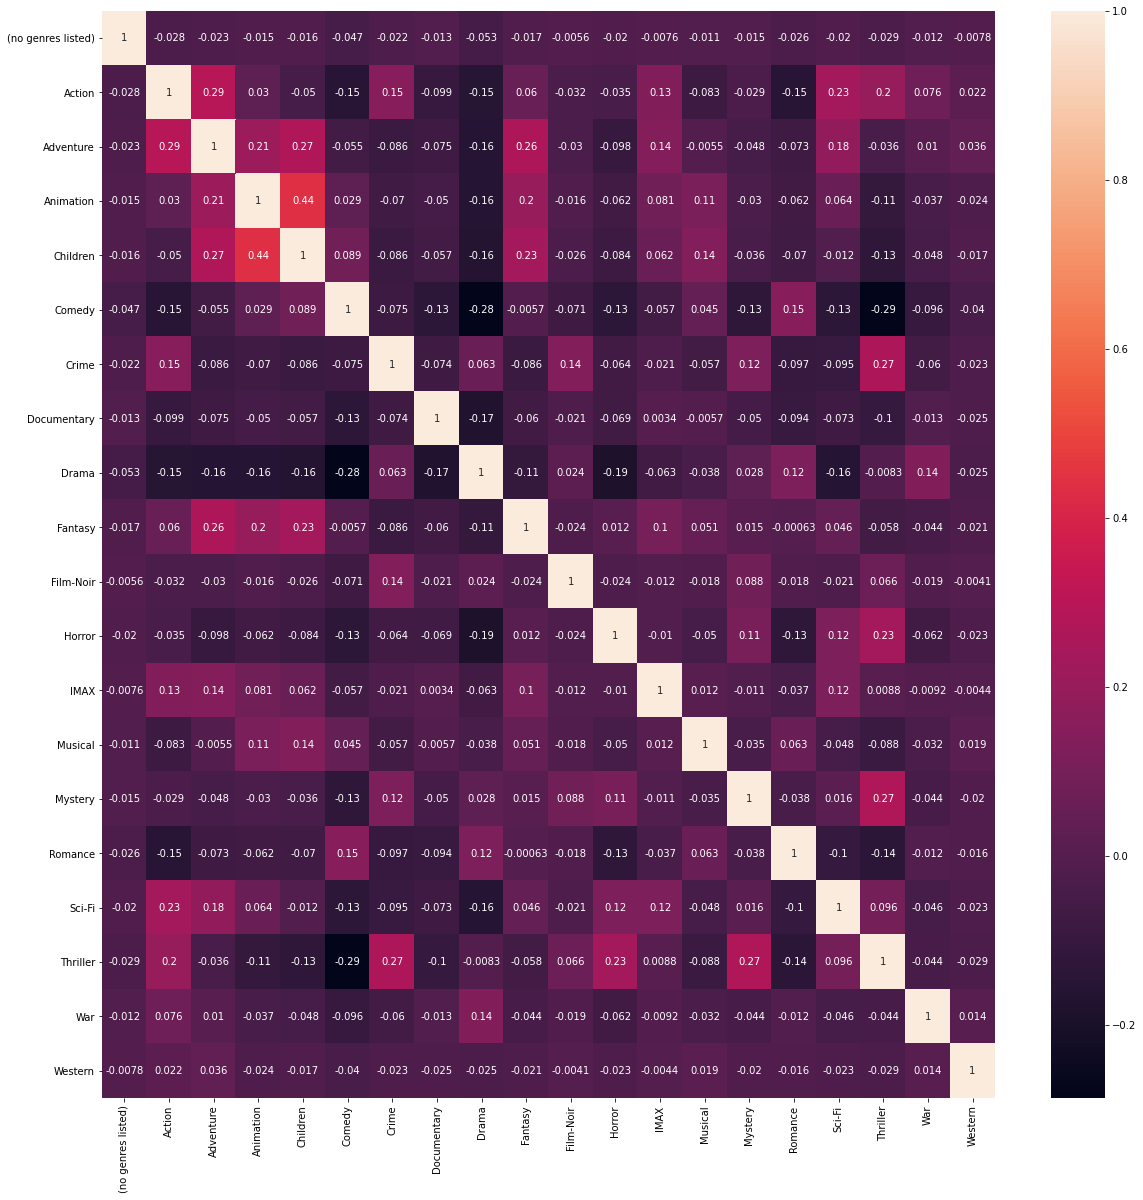

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(genres_df.corr(), annot=True)

# 영화 이름, 연도 분석

In [36]:
movies_df.head(3)

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [37]:
title_df = movies_df.copy()
title_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
title_df['year'] = title_df['title'].str.extract('( \(\d\d\d\d\) )') #정규식표현(괄호치고 숫자네개 괄호닫고 규칙)
title_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movieId,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,(1995)
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,(1995)
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,(1995)
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,(1995)
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(1995)


In [39]:
# 연도 데이터가 없는 영화가 존재
title_df.isna().sum()

title                  0
(no genres listed)     0
Action                 0
Adventure              0
Animation              0
Children               0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Fantasy                0
Film-Noir              0
Horror                 0
IMAX                   0
Musical                0
Mystery                0
Romance                0
Sci-Fi                 0
Thriller               0
War                    0
Western                0
year                  13
dtype: int64

In [40]:
title_df[title_df['year'].isnull()]

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movieId,,,,,,,,,,,,,,,,,,,,,,
40697,Babylon 5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN
140956,Ready Player One,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,NaN
143410,Hyena Road,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
147250,The Adventures of Sherlock Holmes and Doctor W...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
149334,Nocturnal Animals,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,NaN
156605,Paterson,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
162414,Moonlight,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN
167570,The OA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
171495,Cosmos,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


대체로 no genre인 데이터가 많은 편

In [42]:
# 연도가 없거나 장르가 없는 영화 데이터는 드랍
title_df[title_df['(no genres listed)'] == 1].shape

(34, 22)

In [43]:
title_df.dropna(axis=0, inplace=True)
title_df['year'] = title_df['year'].apply(lambda x: x.replace('(','').replace(')',''))
title_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movieId,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1995
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1995
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1995
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1995
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1995


# 연도 별 영화 데이터 분석

In [44]:
year_freq_df = title_df.groupby('year')['title'].count()
year_freq_df

year
1902      1
1903      1
1908      1
1915      1
1916      4
       ... 
2014    278
2015    274
2016    218
2017    147
2018     41
Name: title, Length: 106, dtype: int64

In [45]:
year_freq_df.sort_values(ascending=False)

year
2002    311
2006    295
2001    294
2007    284
2000    283
       ... 
1917      1
1915      1
1908      1
1903      1
1902      1
Name: title, Length: 106, dtype: int64

# 영화 개봉연도, 평점 데이터 분석

In [48]:
# 2016년 영화 평점 평균
ratings_df['rating'][ratings_df['movieId'].isin(title_df[title_df['year']=='2016'].index)].mean()

3.387261146496815

In [49]:
results = []
for year in title_df['year'].unique():
  avg_ratings = ratings_df['rating'][ratings_df['movieId'].isin(title_df[title_df['year']== str(year)].index)].mean()
  results.append((year, avg_ratings))

result_df = pd.DataFrame(results, columns=['year', 'avg_ratings'])
result_df.sort_values(by='year')

,year,avg_ratings
91,1902,3.500000
92,1903,2.500000
105,1908,4.000000
84,1915,2.000000
87,1916,3.600000
...,...,...
100,2014,3.512879
101,2015,3.410386
102,2016,3.387261
103,2017,3.578091


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21b7713e10>]],
      dtype=object)

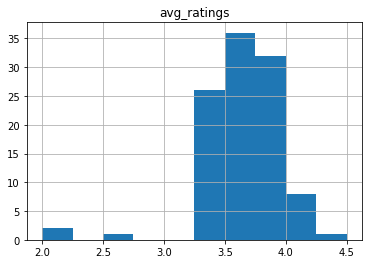

In [50]:
result_df.hist()